In [123]:
import numpy as np
import pandas as pd
import time
import os
import pickle
import string
import psutil
import sklearn

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ggplot import *

import time
from sklearn.manifold import TSNE
import math
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

# Load the trained model  ( categoy 6, categoty 7 and combined)

In [125]:
trained_firm_emb_cat6 = pickle.load(open("trainedModel_cat6.pkl","rb"))
trained_firm_emb_cat7 = pickle.load(open("trainedModel_cat7_50dim.pkl","rb"))
trained_firm_emb = pickle.load(open("trainedModel_full.pkl","rb"))

# Load firm's meta data

In [127]:
firm_metadata = pickle.load(open("Company_meta.pkl","rb"))
firm_metadata_rank = pickle.load(open("Company_meta_rank.pkl","rb"))

# Display dimensions of the firm model
## There are 709 firms and each one is converted into a vector of 150 dimemsions


In [129]:
trained_firm_emb_cat6.shape

(709, 150)

In [130]:
trained_firm_emb_cat7.shape

(709, 50)

# Display embedding

In [132]:
trained_firm_emb_cat6

array([[-0.04860061, -0.03473839, -0.25958973, ..., -0.10420947,
         0.05753648, -0.32928362],
       [-0.11500852, -0.20717913, -0.03973801, ..., -0.19088441,
        -0.06153519, -0.3605412 ],
       [-0.09664674,  0.18264169, -0.14041252, ..., -0.13771427,
         0.18570933,  0.16069964],
       ...,
       [-0.1577583 , -0.07243393,  0.05198075, ..., -0.50375086,
        -0.19283338, -0.04332234],
       [-0.4498655 , -0.00825273, -0.06344679, ..., -0.6656086 ,
        -0.07076515, -0.37830833],
       [-0.2150594 , -0.15177289, -0.37954953, ..., -0.98563874,
        -0.1477117 , -0.27081937]], dtype=float32)

In [133]:
trained_firm_emb_cat7

array([[-1.4599695 , -1.7132171 , -0.28085282, ..., -1.3587035 ,
        -1.1623987 , -1.5784663 ],
       [-0.86632836, -0.7181418 , -0.6193578 , ..., -0.9801835 ,
        -0.87677646, -1.4237553 ],
       [-0.7299734 , -2.0324464 , -0.38609356, ..., -1.2452939 ,
        -0.76017123, -1.4110821 ],
       ...,
       [-0.69569623, -2.1327732 , -0.73752254, ..., -1.2648175 ,
        -0.97800285, -1.5840191 ],
       [-0.9025619 , -2.2000864 , -0.44775936, ..., -1.2546911 ,
        -1.5681647 , -1.5266567 ],
       [-0.6845504 , -2.1020415 , -0.3732625 , ..., -1.3952588 ,
        -1.0984393 , -1.5266112 ]], dtype=float32)

# Display firms meta data

In [146]:
firm_metadata

,CompanyName,ID,State,City,NAICS
0,AAR CORP,0,IL,Wood Dale,42
1,AVX CORP,1,SC,Fountain Inn,33
2,AARON'S INC,2,GA,Atlanta,53
3,ABBOTT LABORATORIES,3,IL,Abbott Park,32
4,ALEXANDER'S INC,4,NJ,Paramus,53
5,ALLEGHANY CORP,5,NY,New York,52
6,US ECOLOGY INC,6,ID,Boise,56
7,ASTRONICS CORP,7,NY,East Aurora,33
8,A V HOMES INC,8,AZ,Scottsdale,23
9,BARNWELL INDUSTRIES,9,HI,Honolulu,23


In [149]:
firm_names = firm_metadata['CompanyName'].tolist()

In [150]:
firm_names

['AAR CORP',
 'AVX CORP',
 "AARON'S INC",
 'ABBOTT LABORATORIES',
 "ALEXANDER'S INC",
 'ALLEGHANY CORP',
 'US ECOLOGY INC',
 'ASTRONICS CORP',
 'A V HOMES INC',
 'BARNWELL INDUSTRIES',
 'BASSETT FURNITURE INDS',
 'CALERES INC',
 'CARDINAL HEALTH INC',
 'CARLISLE COS INC',
 'CHECKPOINT SYSTEMS INC',
 'CHYRONHEGO CORP',
 'CITY NATIONAL CORP',
 'CLOROX CO/DE',
 'CONAGRA BRANDS INC',
 'RAVE RESTAURANT GROUP INC',
 'TRANSCONTINENTAL RLTY INVS',
 'CON-WAY INC',
 'CONTINENTAL MATERIALS CORP',
 'CULP INC',
 'CUMMINS INC',
 'DATARAM CORP - OLD',
 'DELTA NATURAL GAS CO INC',
 'ADTALEM GLOBAL EDUCATION INC',
 'DIODES INC',
 'DUCOMMUN INC',
 'ELECTRO-SENSORS INC',
 'ENERGEN CORP',
 'ENZON PHARMACEUTICALS INC',
 'NEWMARKET CORP',
 'EXPEDITORS INTL WASH INC',
 'SCHAWK INC  -CL A',
 'REGIONS FINANCIAL CORP',
 'FOREST LABORATORIES  -CL A',
 'FREQUENCY ELECTRONICS INC',
 'TEGNA INC',
 'GAP INC',
 'GOLDEN ENTERPRISES',
 'HAWKINS INC',
 'WELLTOWER INC',
 'HEXCEL CORP',
 'HOOPER HOLMES INC',
 'HOVNANIAN E

#  Calculate cosine similarity between the firms

In [135]:
cosine_sim = cosine_similarity(trained_firm_emb)

In [136]:
cosine_sim

array([[1.        , 0.95172393, 0.93132496, ..., 0.9196091 , 0.949473  ,
        0.9405471 ],
       [0.95172393, 1.0000001 , 0.93373024, ..., 0.9402654 , 0.9582252 ,
        0.9562451 ],
       [0.93132496, 0.93373024, 1.        , ..., 0.9309998 , 0.9339712 ,
        0.95893705],
       ...,
       [0.9196091 , 0.9402654 , 0.9309998 , ..., 1.        , 0.9496267 ,
        0.9529298 ],
       [0.949473  , 0.9582252 , 0.9339712 , ..., 0.9496267 , 1.0000001 ,
        0.9477779 ],
       [0.9405471 , 0.9562451 , 0.95893705, ..., 0.9529298 , 0.9477779 ,
        1.0000001 ]], dtype=float32)

In [137]:
cosine_sim.shape

(709, 709)

In [ ]:
## cosine  similarity df 

In [138]:
 cosine_sim_df = pd.DataFrame(cosine_sim)

In [139]:
cosine_sim_df

,0,1,2,3,4,5,6,7,8,9,...,699,700,701,702,703,704,705,706,707,708
0,1.000000,0.951724,0.931325,0.944847,0.896468,0.931607,0.922152,0.912585,0.946674,0.927105,...,0.906696,0.945990,0.965103,0.914597,0.905080,0.907827,0.935230,0.919609,0.949473,0.940547
1,0.951724,1.000000,0.933730,0.924228,0.893770,0.908207,0.909429,0.924293,0.911230,0.912601,...,0.908250,0.944928,0.965134,0.879808,0.919279,0.936567,0.933957,0.940265,0.958225,0.956245
2,0.931325,0.933730,1.000000,0.931270,0.912238,0.921140,0.937353,0.950436,0.915815,0.931530,...,0.934255,0.922630,0.960991,0.910418,0.935201,0.949531,0.945687,0.931000,0.933971,0.958937
3,0.944847,0.924228,0.931270,1.000000,0.908437,0.930180,0.957034,0.935826,0.939521,0.891800,...,0.903002,0.932083,0.946370,0.928045,0.941431,0.931404,0.941895,0.921890,0.956803,0.928934
4,0.896468,0.893770,0.912238,0.908437,1.000000,0.917145,0.918029,0.887055,0.892336,0.886234,...,0.889989,0.919734,0.930077,0.889862,0.890543,0.901961,0.895272,0.904079,0.899602,0.919373
5,0.931607,0.908207,0.921140,0.930180,0.917145,1.000000,0.933643,0.919482,0.955791,0.899864,...,0.914100,0.919986,0.932116,0.944895,0.925799,0.890093,0.917121,0.909809,0.936135,0.936319
6,0.922152,0.909429,0.937353,0.957034,0.918029,0.933643,1.000000,0.947061,0.920212,0.900407,...,0.929297,0.918161,0.940261,0.938968,0.940098,0.910649,0.942560,0.945239,0.948171,0.946170
7,0.912585,0.924293,0.950436,0.935826,0.887055,0.919482,0.947061,1.000000,0.933895,0.886702,...,0.899509,0.898595,0.947402,0.926824,0.946476,0.930147,0.936372,0.906281,0.944267,0.944041
8,0.946674,0.911230,0.915815,0.939521,0.892336,0.955791,0.920212,0.933895,1.000000,0.892247,...,0.887305,0.905035,0.939779,0.948634,0.907635,0.897985,0.915288,0.890352,0.927116,0.941042
9,0.927105,0.912601,0.931530,0.891800,0.886234,0.899864,0.900407,0.886702,0.892247,1.000000,...,0.913862,0.942378,0.946787,0.869635,0.898040,0.909441,0.923918,0.947009,0.920742,0.943503


In [162]:
cosine_sim_df.columns = firm_names

In [163]:
cosine_sim_df

,AAR CORP,AVX CORP,AARON'S INC,ABBOTT LABORATORIES,ALEXANDER'S INC,ALLEGHANY CORP,US ECOLOGY INC,ASTRONICS CORP,A V HOMES INC,BARNWELL INDUSTRIES,...,K-SWISS INC -CL A,BLACKROCK MUNI 2018 TERM TR,NUVEEN ARIZ DIVID ADV MUN FD,COMMUNITY FINANCIAL CORP/VA,TITANIUM METALS CORP,ROBBINS & MYERS INC,NUVEEN MICH PREM INCM MUN FD,SUNRISE SENIOR LIVING INC,ALLIANCE BANKSHARES CORP,CARIBOU COFFEE CO
0,1.000000,0.951724,0.931325,0.944847,0.896468,0.931607,0.922152,0.912585,0.946674,0.927105,...,0.906696,0.945990,0.965103,0.914597,0.905080,0.907827,0.935230,0.919609,0.949473,0.940547
1,0.951724,1.000000,0.933730,0.924228,0.893770,0.908207,0.909429,0.924293,0.911230,0.912601,...,0.908250,0.944928,0.965134,0.879808,0.919279,0.936567,0.933957,0.940265,0.958225,0.956245
2,0.931325,0.933730,1.000000,0.931270,0.912238,0.921140,0.937353,0.950436,0.915815,0.931530,...,0.934255,0.922630,0.960991,0.910418,0.935201,0.949531,0.945687,0.931000,0.933971,0.958937
3,0.944847,0.924228,0.931270,1.000000,0.908437,0.930180,0.957034,0.935826,0.939521,0.891800,...,0.903002,0.932083,0.946370,0.928045,0.941431,0.931404,0.941895,0.921890,0.956803,0.928934
4,0.896468,0.893770,0.912238,0.908437,1.000000,0.917145,0.918029,0.887055,0.892336,0.886234,...,0.889989,0.919734,0.930077,0.889862,0.890543,0.901961,0.895272,0.904079,0.899602,0.919373
5,0.931607,0.908207,0.921140,0.930180,0.917145,1.000000,0.933643,0.919482,0.955791,0.899864,...,0.914100,0.919986,0.932116,0.944895,0.925799,0.890093,0.917121,0.909809,0.936135,0.936319
6,0.922152,0.909429,0.937353,0.957034,0.918029,0.933643,1.000000,0.947061,0.920212,0.900407,...,0.929297,0.918161,0.940261,0.938968,0.940098,0.910649,0.942560,0.945239,0.948171,0.946170
7,0.912585,0.924293,0.950436,0.935826,0.887055,0.919482,0.947061,1.000000,0.933895,0.886702,...,0.899509,0.898595,0.947402,0.926824,0.946476,0.930147,0.936372,0.906281,0.944267,0.944041
8,0.946674,0.911230,0.915815,0.939521,0.892336,0.955791,0.920212,0.933895,1.000000,0.892247,...,0.887305,0.905035,0.939779,0.948634,0.907635,0.897985,0.915288,0.890352,0.927116,0.941042
9,0.927105,0.912601,0.931530,0.891800,0.886234,0.899864,0.900407,0.886702,0.892247,1.000000,...,0.913862,0.942378,0.946787,0.869635,0.898040,0.909441,0.923918,0.947009,0.920742,0.943503


In [152]:
 most_similar_firms_df = pd.DataFrame(np.sort(cosine_sim_df.values)[:,-2:], columns=['2nd-largest','largest'])

In [153]:
most_similar_firms_df

,2nd-largest,largest
0,0.978143,1.0
1,0.965134,1.0
2,0.968720,1.0
3,0.971955,1.0
4,0.952002,1.0
5,0.965266,1.0
6,0.970119,1.0
7,0.967211,1.0
8,0.966292,1.0
9,0.956448,1.0


In [158]:
cos_sim_df =pd.DataFrame(cosine_sim_df).T

In [167]:
cos_sim_df

,0,1,2,3,4,5,6,7,8,9,...,699,700,701,702,703,704,705,706,707,708
AAR CORP,1.000000,0.951724,0.931325,0.944847,0.896468,0.931607,0.922152,0.912585,0.946674,0.927105,...,0.906696,0.945990,0.965103,0.914597,0.905080,0.907827,0.935230,0.919609,0.949473,0.940547
AVX CORP,0.951724,1.000000,0.933730,0.924228,0.893770,0.908207,0.909429,0.924293,0.911230,0.912601,...,0.908250,0.944928,0.965134,0.879808,0.919279,0.936567,0.933957,0.940265,0.958225,0.956245
AARON'S INC,0.931325,0.933730,1.000000,0.931270,0.912238,0.921140,0.937353,0.950436,0.915815,0.931530,...,0.934255,0.922630,0.960991,0.910418,0.935201,0.949531,0.945687,0.931000,0.933971,0.958937
ABBOTT LABORATORIES,0.944847,0.924228,0.931270,1.000000,0.908437,0.930180,0.957034,0.935826,0.939521,0.891800,...,0.903002,0.932083,0.946370,0.928045,0.941431,0.931404,0.941895,0.921890,0.956803,0.928934
ALEXANDER'S INC,0.896468,0.893770,0.912238,0.908437,1.000000,0.917145,0.918029,0.887055,0.892336,0.886234,...,0.889989,0.919734,0.930077,0.889862,0.890543,0.901961,0.895272,0.904079,0.899602,0.919373
ALLEGHANY CORP,0.931607,0.908207,0.921140,0.930180,0.917145,1.000000,0.933643,0.919482,0.955791,0.899864,...,0.914100,0.919986,0.932116,0.944895,0.925799,0.890093,0.917121,0.909809,0.936135,0.936319
US ECOLOGY INC,0.922152,0.909429,0.937353,0.957034,0.918029,0.933643,1.000000,0.947061,0.920212,0.900407,...,0.929297,0.918161,0.940261,0.938968,0.940098,0.910649,0.942560,0.945239,0.948171,0.946170
ASTRONICS CORP,0.912585,0.924293,0.950436,0.935826,0.887055,0.919482,0.947061,1.000000,0.933895,0.886702,...,0.899509,0.898595,0.947402,0.926824,0.946476,0.930147,0.936372,0.906281,0.944267,0.944041
A V HOMES INC,0.946674,0.911230,0.915815,0.939521,0.892336,0.955791,0.920212,0.933895,1.000000,0.892247,...,0.887305,0.905035,0.939779,0.948634,0.907635,0.897985,0.915288,0.890352,0.927116,0.941042
BARNWELL INDUSTRIES,0.927105,0.912601,0.931530,0.891800,0.886234,0.899864,0.900407,0.886702,0.892247,1.000000,...,0.913862,0.942378,0.946787,0.869635,0.898040,0.909441,0.923918,0.947009,0.920742,0.943503


In [172]:

result = pd.DataFrame(np.zeros((0,3)), columns=['top1','top2','top3'])

for i in cos_sim_df.columns:
    df1row = pd.DataFrame(cos_sim_df.nlargest(3, i).index.tolist(), index=['top1','top2','top3']).T
    result = pd.concat([result, df1row], axis=0)

print(result)

                            top1                          top2  \
0                       AAR CORP                    DIODES INC   
0                       AVX CORP  NUVEEN ARIZ DIVID ADV MUN FD   
0                    AARON'S INC          TTM TECHNOLOGIES INC   
0            ABBOTT LABORATORIES           UNITED CAPITAL CORP   
0                ALEXANDER'S INC     BASIC ENERGY SERVICES INC   
0                 ALLEGHANY CORP      BANK SOUTH CAROLINA CORP   
0                 US ECOLOGY INC                  INNOSPEC INC   
0                 ASTRONICS CORP   NUVEEN CAL PERFORM PLUS MUN   
0                  A V HOMES INC     CONNECTICUT WATER SVC INC   
0            BARNWELL INDUSTRIES          FMC TECHNOLOGIES INC   
0         BASSETT FURNITURE INDS         NORFOLK SOUTHERN CORP   
0                    CALERES INC                STARBUCKS CORP   
0            CARDINAL HEALTH INC                    KIRBY CORP   
0               CARLISLE COS INC          RESOURCE AMERICA INC   
0         

# First and second most similar firms to a firm

In [173]:
result.columns = ['Self','MostSimilarFirm','SecondMostSimilarFirm']

In [174]:
result

,Self,MostSimilarFirm,SecondMostSimilarFirm
0,AAR CORP,DIODES INC,BIOMED REALTY TRUST INC
0,AVX CORP,NUVEEN ARIZ DIVID ADV MUN FD,HAEMONETICS CORP
0,AARON'S INC,TTM TECHNOLOGIES INC,GAP INC
0,ABBOTT LABORATORIES,UNITED CAPITAL CORP,WINTRUST FINANCIAL CORP
0,ALEXANDER'S INC,BASIC ENERGY SERVICES INC,DREYFUS STRATEGIC MUNI
0,ALLEGHANY CORP,BANK SOUTH CAROLINA CORP,ORMAT TECHNOLOGIES INC
0,US ECOLOGY INC,INNOSPEC INC,CITY NATIONAL CORP
0,ASTRONICS CORP,NUVEEN CAL PERFORM PLUS MUN,FALCONSTOR SOFTWARE INC
0,A V HOMES INC,CONNECTICUT WATER SVC INC,ENERGY SERVICES OF AMERICA
0,BARNWELL INDUSTRIES,FMC TECHNOLOGIES INC,CRESTWOOD MIDSTREAM PTNRS LP


In [22]:
## Display firms meta data

In [23]:
firm_metadata

,CompanyName,ID,State,City,NAICS
0,AAR CORP,0,IL,Wood Dale,42
1,AVX CORP,1,SC,Fountain Inn,33
2,AARON'S INC,2,GA,Atlanta,53
3,ABBOTT LABORATORIES,3,IL,Abbott Park,32
4,ALEXANDER'S INC,4,NJ,Paramus,53
5,ALLEGHANY CORP,5,NY,New York,52
6,US ECOLOGY INC,6,ID,Boise,56
7,ASTRONICS CORP,7,NY,East Aurora,33
8,A V HOMES INC,8,AZ,Scottsdale,23
9,BARNWELL INDUSTRIES,9,HI,Honolulu,23


# Firms' industries

In [178]:
cols = ['MostSimilarFirm','Industry']
firm_name_with_industry = firm_metadata[['CompanyName','NAICS']]

In [179]:
firm_name_with_industry.columns = cols

In [180]:
firm_name_with_industry

,MostSimilarFirm,Industry
0,AAR CORP,42
1,AVX CORP,33
2,AARON'S INC,53
3,ABBOTT LABORATORIES,32
4,ALEXANDER'S INC,53
5,ALLEGHANY CORP,52
6,US ECOLOGY INC,56
7,ASTRONICS CORP,33
8,A V HOMES INC,23
9,BARNWELL INDUSTRIES,23


In [185]:
self_industry = ['Self','Self_Industry']

In [182]:
self_with_industry = firm_metadata[['CompanyName','NAICS']]

In [186]:
self_with_industry.columns = self_industry

In [187]:
self_with_industry

,Self,Self_Industry
0,AAR CORP,42
1,AVX CORP,33
2,AARON'S INC,53
3,ABBOTT LABORATORIES,32
4,ALEXANDER'S INC,53
5,ALLEGHANY CORP,52
6,US ECOLOGY INC,56
7,ASTRONICS CORP,33
8,A V HOMES INC,23
9,BARNWELL INDUSTRIES,23


In [189]:
joined_firm_self_industry = pd.merge(self_with_industry, result, on='Self', how='inner')

# Similar firms with their NAICS code

In [190]:
joined_firm_self_industry

,Self,Self_Industry,MostSimilarFirm,SecondMostSimilarFirm
0,AAR CORP,42,DIODES INC,BIOMED REALTY TRUST INC
1,AVX CORP,33,NUVEEN ARIZ DIVID ADV MUN FD,HAEMONETICS CORP
2,AARON'S INC,53,TTM TECHNOLOGIES INC,GAP INC
3,ABBOTT LABORATORIES,32,UNITED CAPITAL CORP,WINTRUST FINANCIAL CORP
4,ALEXANDER'S INC,53,BASIC ENERGY SERVICES INC,DREYFUS STRATEGIC MUNI
5,ALLEGHANY CORP,52,BANK SOUTH CAROLINA CORP,ORMAT TECHNOLOGIES INC
6,US ECOLOGY INC,56,INNOSPEC INC,CITY NATIONAL CORP
7,ASTRONICS CORP,33,NUVEEN CAL PERFORM PLUS MUN,FALCONSTOR SOFTWARE INC
8,A V HOMES INC,23,CONNECTICUT WATER SVC INC,ENERGY SERVICES OF AMERICA
9,BARNWELL INDUSTRIES,23,FMC TECHNOLOGIES INC,CRESTWOOD MIDSTREAM PTNRS LP


In [191]:
joined_firm_self_industry_sim = pd.merge(joined_firm_self_industry,firm_name_with_industry, on='MostSimilarFirm', how='inner')

In [192]:
joined_firm_self_industry_sim

,Self,Self_Industry,MostSimilarFirm,SecondMostSimilarFirm,Industry
0,AAR CORP,42,DIODES INC,BIOMED REALTY TRUST INC,33
1,AVX CORP,33,NUVEEN ARIZ DIVID ADV MUN FD,HAEMONETICS CORP,52
2,METHODE ELECTRONICS INC,33,NUVEEN ARIZ DIVID ADV MUN FD,VERIFONE SYSTEMS INC,52
3,JACK IN THE BOX INC,72,NUVEEN ARIZ DIVID ADV MUN FD,EATON VANCE TX ADV GLBL DIV,52
4,DICKS SPORTING GOODS INC,45,NUVEEN ARIZ DIVID ADV MUN FD,LMP CAPITAL & INCOME FND INC,52
5,MARLIN BUSINESS SERVICES INC,52,NUVEEN ARIZ DIVID ADV MUN FD,PIMCO INCOME STRATEGY FUND,52
6,HIBBETT SPORTS INC,45,NUVEEN ARIZ DIVID ADV MUN FD,GASCO ENERGY INC,52
7,ATRICURE INC,33,NUVEEN ARIZ DIVID ADV MUN FD,OXFORD INDUSTRIES INC,52
8,NUVEEN MICH PREM INCM MUN FD,52,NUVEEN ARIZ DIVID ADV MUN FD,PUTNAM MASTER INTERM INCOME,52
9,AARON'S INC,53,TTM TECHNOLOGIES INC,GAP INC,33


In [199]:
similar_industry_columns = ['Self_Industry_code','MostSimilarIndustry_code']

In [196]:
similar_industry_df = joined_firm_self_industry_sim[['Self_Industry','Industry']]

In [200]:
similar_industry_df.columns = similar_industry_columns

In [201]:
similar_industry_df

,Self_Industry_code,MostSimilarIndustry_code
0,42,33
1,33,52
2,33,52
3,72,52
4,45,52
5,52,52
6,45,52
7,33,52
8,52,52
9,53,33


In [203]:
similar_industry_df.to_pickle("firmRelations.pkl")

In [ ]:
#count_similar_rows = pd.DataFrame({"256":[2,2,4,4], "Z": [2,3,4,9]})

In [213]:
new_df = similar_industry_df[((similar_industry_df['Self_Industry_code'] == 52) & (similar_industry_df['MostSimilarIndustry_code'] == 33)
                             )| ((similar_industry_df['Self_Industry_code'] == 33) & (similar_industry_df['MostSimilarIndustry_code'] == 52))
                            |((similar_industry_df['Self_Industry_code'] == 31) & (similar_industry_df['MostSimilarIndustry_code'] == 52))
                            |((similar_industry_df['Self_Industry_code'] == 32) & (similar_industry_df['MostSimilarIndustry_code'] == 52))
                            |((similar_industry_df['Self_Industry_code'] == 52) & (similar_industry_df['MostSimilarIndustry_code'] == 32))
                            |((similar_industry_df['Self_Industry_code'] == 52) & (similar_industry_df['MostSimilarIndustry_code'] == 31))
                            |((similar_industry_df['Self_Industry_code'] == 33) & (similar_industry_df['MostSimilarIndustry_code'] == 31))
                            |((similar_industry_df['Self_Industry_code'] == 33) & (similar_industry_df['MostSimilarIndustry_code'] == 32))
                            |((similar_industry_df['Self_Industry_code'] == 32) & (similar_industry_df['MostSimilarIndustry_code'] == 33))
                            |((similar_industry_df['Self_Industry_code'] == 31) & (similar_industry_df['MostSimilarIndustry_code'] == 33))
                            |((similar_industry_df['Self_Industry_code'] == 32) & (similar_industry_df['MostSimilarIndustry_code'] == 31))
                            |((similar_industry_df['Self_Industry_code'] == 31) & (similar_industry_df['MostSimilarIndustry_code'] == 32))
                            |((similar_industry_df['Self_Industry_code'] == 52) & (similar_industry_df['MostSimilarIndustry_code'] == 33))]

In [214]:
new_df

,Self_Industry_code,MostSimilarIndustry_code
1,33,52
2,33,52
7,33,52
19,33,52
23,33,52
33,52,33
35,52,33
39,32,52
40,32,52
42,33,32


In [216]:
new_df_common = similar_industry_df[similar_industry_df['Self_Industry_code'] ==  similar_industry_df['MostSimilarIndustry_code']]
new_df_common

,Self_Industry_code,MostSimilarIndustry_code
5,52,52
8,52,52
18,52,52
21,52,52
41,52,52
69,52,52
71,52,52
72,52,52
97,52,52
126,52,52


# Firms with their ranks

In [108]:
firm_metadata_rank

,CompanyName,ID,State,City,NAICS,Rank
0,AAR CORP,0,IL,Wood Dale,42,B
1,AVX CORP,1,SC,Fountain Inn,33,B
2,AARON'S INC,2,GA,Atlanta,53,A-
3,ABBOTT LABORATORIES,3,IL,Abbott Park,32,B
4,ALEXANDER'S INC,4,NJ,Paramus,53,B
5,ALLEGHANY CORP,5,NY,New York,52,B-
6,US ECOLOGY INC,6,ID,Boise,56,B+
7,ASTRONICS CORP,7,NY,East Aurora,33,B
8,A V HOMES INC,8,AZ,Scottsdale,23,B-
9,BARNWELL INDUSTRIES,9,HI,Honolulu,23,C


# Display count of unique cities of the firms

In [25]:
len(firm_metadata.City.unique())

342

# Display count of unique states of the firms

In [27]:
len(firm_metadata.State.unique())

48

# Display count of unique NAICS

In [29]:
len(firm_metadata.NAICS.unique())

23

# Normalize the embedded units

In [31]:
def normalize_to_unit_emb(emb):
    norms = np.linalg.norm(emb,axis=1).reshape(-1,1)
    normalized_emb = emb/norms
    return normalized_emb

# PCA

In [84]:
normalized_emb_cat6 = normalize_to_unit_emb(trained_firm_emb_cat6)
normalized_emb_cat7 = normalize_to_unit_emb(trained_firm_emb_cat7)
normalized_emb = normalize_to_unit_emb(trained_firm_emb)
#normalized_emb_stockClass = normalize_to_unit_emb(trained_firm_emb_stockclass)

pca = PCA(n_components=3)

pca_result_cat6 = pca.fit_transform(normalized_emb_cat6)
pca_result_cat7 = pca.fit_transform(normalized_emb_cat7)
pca_result = pca.fit_transform(normalized_emb)
#pca_result_stockClass = pca.fit_transform(normalized_emb_stockClass)

# T-sne

In [85]:
# do tsne for firms embedding for stock encoded
#time_start = time.time()
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000)
#tsne_results_stock = tsne.fit_transform(pca_result_stockClass)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 510 samples in 0.013s...
[t-SNE] Computed neighbors for 510 samples in 0.050s...
[t-SNE] Computed conditional probabilities for sample 510 / 510
[t-SNE] Mean sigma: 0.027820
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.530594
[t-SNE] Error after 1400 iterations: 0.593732


# Convert category 6 embeddings to two dimensional vector

In [35]:
# do tsne for firms embedding for category 6 cases
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000)
tsne_results_cat6 = tsne.fit_transform(pca_result_cat6)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 709 samples in 0.001s...
[t-SNE] Computed neighbors for 709 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 709 / 709
[t-SNE] Mean sigma: 0.059994
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.610043
[t-SNE] Error after 2300 iterations: 0.627748


# Convert category 7 embeddings to two dimensional vector

In [66]:
# do tsne for firms embedding for category 7 cases
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000)
tsne_results_cat7 = tsne.fit_transform(pca_result_cat7)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 709 samples in 0.002s...
[t-SNE] Computed neighbors for 709 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 709 / 709
[t-SNE] Mean sigma: 0.022860
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.159832
[t-SNE] Error after 1750 iterations: 0.640602


# Convert category 6 + category 7 embeddings to two dimensional vector

In [37]:
# do tsne for firms embedding for both cat6 and cat7
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000)
tsne_results = tsne.fit_transform(pca_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 709 samples in 0.002s...
[t-SNE] Computed neighbors for 709 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 709 / 709
[t-SNE] Mean sigma: 0.032499
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.196579
[t-SNE] Error after 2050 iterations: 0.677090


In [181]:
tsne_results_cat6.shape

(709, 2)

In [67]:
tsne_results_cat7.shape

(709, 2)

# Display 2 dimentional firm vector

In [184]:
tsne_results_cat6

array([[ -7.9512806, -13.888682 ],
       [  3.7319703, -15.826772 ],
       [ -9.134866 , -16.867884 ],
       ...,
       [  8.389114 ,  12.317615 ],
       [-13.342162 ,   9.32832  ],
       [ 20.16958  ,   2.813135 ]], dtype=float32)

In [185]:
tsne_results_cat7

array([[ 14.252677  ,   0.861243  ],
       [  6.5967917 , -19.600311  ],
       [ 23.240135  ,   9.126796  ],
       ...,
       [ -2.2115955 ,   2.5759802 ],
       [ -3.1613574 ,  -3.888582  ],
       [-20.838545  ,  -0.53990155]], dtype=float32)

In [217]:
tsne_results

array([[-15.102431 ,  12.906728 ],
       [-14.614507 ,  14.399132 ],
       [ -9.443826 ,   1.3039913],
       ...,
       [  8.579287 ,  13.54786  ],
       [-17.32282  ,   4.4969416],
       [  2.925272 ,  10.463079 ]], dtype=float32)

# Normalize 2 d embeddings to plot cosine similarity

In [218]:
normalized_emb_2d = normalize_to_unit_emb(tsne_results)

# Make dataframe of the vector for each embedding

In [219]:
visualize_firms_cat6 = pd.DataFrame(tsne_results_cat6,columns=['x', 'y'])

visualize_firms_cat7 = pd.DataFrame(tsne_results_cat7,columns=['x', 'y'])

visualize_firms = pd.DataFrame(normalized_emb_2d,columns=['x', 'y'])

In [188]:
visualize_firms_cat6

,x,y
0,-7.951281,-13.888682
1,3.731970,-15.826772
2,-9.134866,-16.867884
3,-6.277950,-14.336131
4,3.158447,-20.910286
5,0.565869,-16.739170
6,0.778254,-15.902281
7,-7.115036,-11.661075
8,-1.109219,-19.285398
9,-4.133062,9.644718


In [69]:
visualize_firms_cat7

,x,y
0,2.395641,11.462715
1,-7.097342,-6.343153
2,13.932307,-10.993982
3,-14.748530,-15.349880
4,16.474550,-8.968851
5,3.265427,6.388763
6,-3.643417,-17.815725
7,14.856874,-0.583008
8,9.049272,5.918069
9,8.613024,12.041156


# To visualize firm embedding against their indusctries

In [42]:
visualize_firms_cat6["NAICS"]=firm_metadata["NAICS"]

In [70]:
visualize_firms_cat7["NAICS"]=firm_metadata["NAICS"]

In [220]:
visualize_firms["NAICS"]=firm_metadata["NAICS"]

In [45]:
visualize_firms_cat6

,x,y,NAICS
0,-16.250542,5.416936,42
1,-16.541592,-6.980558,33
2,-18.810699,6.272165,53
3,-16.369219,3.515242,32
4,-22.207106,-6.853879,53
5,-18.387045,-4.995821,52
6,-17.354620,-4.154486,56
7,-14.044780,5.020558,33
8,-20.667770,-2.822670,23
9,7.939949,3.831326,23


In [71]:
visualize_firms_cat7

,x,y,NAICS
0,2.395641,11.462715,42
1,-7.097342,-6.343153,33
2,13.932307,-10.993982,53
3,-14.748530,-15.349880,32
4,16.474550,-8.968851,53
5,3.265427,6.388763,52
6,-3.643417,-17.815725,56
7,14.856874,-0.583008,33
8,9.049272,5.918069,23
9,8.613024,12.041156,23


In [47]:
visualize_firms_cat6.NAICS.unique()

array([42, 33, 53, 32, 52, 56, 23, 31, 49, 22, 61, 21, 48, 51, 44, 62, 45,
       72, 54, 11, 71, 81, 99], dtype=object)

In [48]:
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 42, 'NAICS'] = "Wholesale Trade"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 33, 'NAICS'] = "Manufacturing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 31, 'NAICS'] = "Manufacturing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 32, 'NAICS'] = "Manufacturing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 23, 'NAICS'] = "Construction"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 53, 'NAICS'] = "Real Estate and Rental and Leasing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 52, 'NAICS'] = "Finance and Insurance"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 56, 'NAICS'] = "Administrative and Support and Waste Management"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 49, 'NAICS'] = "Transportation and Warehousing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 22, 'NAICS'] = "Utilities"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 61, 'NAICS'] = "Educational Services"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 21, 'NAICS'] = "Oil and Gas Extraction"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 48, 'NAICS'] = "Transportation and Warehousing"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 51, 'NAICS'] = " Information"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 44, 'NAICS'] = "Retail Trade"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 62, 'NAICS'] = "Health Care and Social Assistance"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 45, 'NAICS'] = "Retail Trade"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 72, 'NAICS'] = "Accommodation and Food Services"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 54, 'NAICS'] = "Professional, Scientific, and Technical Services"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 11, 'NAICS'] = "Agriculture, Forestry, Fishing and Hunting"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 71, 'NAICS'] = "Arts, Entertainment, and Recreation"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 81, 'NAICS'] = "Other Services"
visualize_firms_cat6.loc[visualize_firms_cat6.NAICS == 99, 'NAICS'] = "Unidentified"


In [49]:
visualize_firms_cat6

,x,y,NAICS
0,-16.250542,5.416936,Wholesale Trade
1,-16.541592,-6.980558,Manufacturing
2,-18.810699,6.272165,Real Estate and Rental and Leasing
3,-16.369219,3.515242,Manufacturing
4,-22.207106,-6.853879,Real Estate and Rental and Leasing
5,-18.387045,-4.995821,Finance and Insurance
6,-17.354620,-4.154486,Administrative and Support and Waste Management
7,-14.044780,5.020558,Manufacturing
8,-20.667770,-2.822670,Construction
9,7.939949,3.831326,Construction


In [50]:
visualize_firms_cat7.NAICS.unique()

array([42, 33, 53, 32, 52, 56, 23, 31, 49, 22, 61, 21, 48, 51, 44, 62, 45,
       72, 54, 11, 71, 81, 99], dtype=object)

In [72]:
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 42, 'NAICS'] = "Wholesale Trade"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 33, 'NAICS'] = "Manufacturing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 31, 'NAICS'] = "Manufacturing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 32, 'NAICS'] = "Manufacturing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 23, 'NAICS'] = "Construction"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 53, 'NAICS'] = "Real Estate and Rental and Leasing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 52, 'NAICS'] = "Finance and Insurance"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 56, 'NAICS'] = "Administrative and Support and Waste Management"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 49, 'NAICS'] = "Transportation and Warehousing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 22, 'NAICS'] = "Utilities"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 61, 'NAICS'] = "Educational Services"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 21, 'NAICS'] = "Oil and Gas Extraction"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 48, 'NAICS'] = "Transportation and Warehousing"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 51, 'NAICS'] = " Information"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 44, 'NAICS'] = "Retail Trade"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 62, 'NAICS'] = "Health Care and Social Assistance"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 45, 'NAICS'] = "Retail Trade"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 72, 'NAICS'] = "Accommodation and Food Services"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 54, 'NAICS'] = "Professional, Scientific, and Technical Services"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 11, 'NAICS'] = "Agriculture, Forestry, Fishing and Hunting"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 71, 'NAICS'] = "Arts, Entertainment, and Recreation"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 81, 'NAICS'] = "Other Services"
visualize_firms_cat7.loc[visualize_firms_cat7.NAICS == 99, 'NAICS'] = "Unidentified"


In [73]:
visualize_firms_cat7

,x,y,NAICS
0,2.395641,11.462715,Wholesale Trade
1,-7.097342,-6.343153,Manufacturing
2,13.932307,-10.993982,Real Estate and Rental and Leasing
3,-14.748530,-15.349880,Manufacturing
4,16.474550,-8.968851,Real Estate and Rental and Leasing
5,3.265427,6.388763,Finance and Insurance
6,-3.643417,-17.815725,Administrative and Support and Waste Management
7,14.856874,-0.583008,Manufacturing
8,9.049272,5.918069,Construction
9,8.613024,12.041156,Construction


In [221]:
visualize_firms.loc[visualize_firms.NAICS == 42, 'NAICS'] = "Wholesale Trade"
visualize_firms.loc[visualize_firms.NAICS == 33, 'NAICS'] = "Manufacturing"
visualize_firms.loc[visualize_firms.NAICS == 31, 'NAICS'] = "Manufacturing"
visualize_firms.loc[visualize_firms.NAICS == 32, 'NAICS'] = "Manufacturing"
visualize_firms.loc[visualize_firms.NAICS == 23, 'NAICS'] = "Construction"
visualize_firms.loc[visualize_firms.NAICS == 53, 'NAICS'] = "Real Estate and Rental and Leasing"
visualize_firms.loc[visualize_firms.NAICS == 52, 'NAICS'] = "Finance and Insurance"
visualize_firms.loc[visualize_firms.NAICS == 56, 'NAICS'] = "Administrative and Support and Waste Management"
visualize_firms.loc[visualize_firms.NAICS == 49, 'NAICS'] = "Transportation and Warehousing"
visualize_firms.loc[visualize_firms.NAICS == 22, 'NAICS'] = "Utilities"
visualize_firms.loc[visualize_firms.NAICS == 61, 'NAICS'] = "Educational Services"
visualize_firms.loc[visualize_firms.NAICS == 21, 'NAICS'] = "Oil and Gas Extraction"
visualize_firms.loc[visualize_firms.NAICS == 48, 'NAICS'] = "Transportation and Warehousing"
visualize_firms.loc[visualize_firms.NAICS == 51, 'NAICS'] = "Information"
visualize_firms.loc[visualize_firms.NAICS == 44, 'NAICS'] = "Retail Trade"
visualize_firms.loc[visualize_firms.NAICS == 62, 'NAICS'] = "Health Care and Social Assistance"
visualize_firms.loc[visualize_firms.NAICS == 45, 'NAICS'] = "Retail Trade"
visualize_firms.loc[visualize_firms.NAICS == 72, 'NAICS'] = "Accommodation and Food Services"
visualize_firms.loc[visualize_firms.NAICS == 54, 'NAICS'] = "Professional, Scientific, and Technical Services"
visualize_firms.loc[visualize_firms.NAICS == 11, 'NAICS'] = "Agriculture, Forestry, Fishing and Hunting"
visualize_firms.loc[visualize_firms.NAICS == 71, 'NAICS'] = "Arts, Entertainment, and Recreation"
visualize_firms.loc[visualize_firms.NAICS == 81, 'NAICS'] = "Other Services"
visualize_firms.loc[visualize_firms.NAICS == 99, 'NAICS'] = "Unidentified"


# Visualize firm embedding done by category 6 and catergory 7 cases 

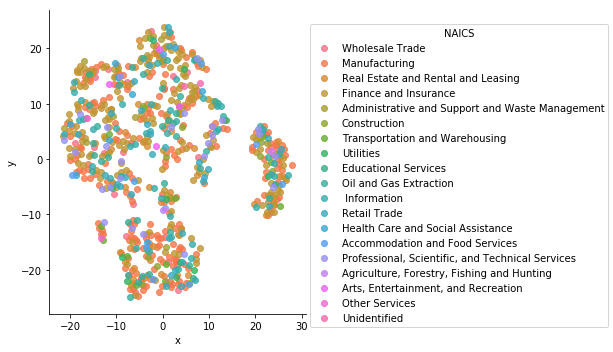

In [201]:
sns.lmplot( x="x", y="y", data=visualize_firms_cat6, hue="NAICS",fit_reg=False, legend=True)
plt.show()

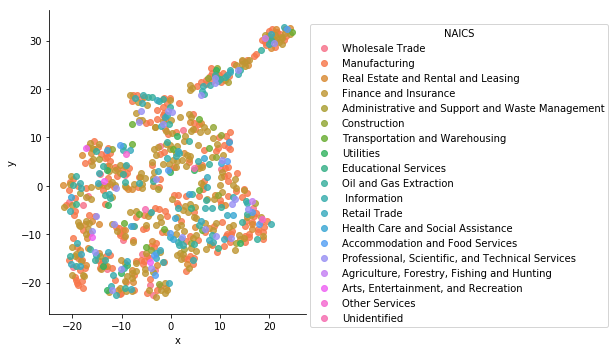

In [74]:
sns.lmplot( x="x", y="y", data=visualize_firms_cat7, hue="NAICS",fit_reg=False, legend=True)
plt.show()

In [250]:
visualize_firms_Manufacturing = visualize_firms[visualize_firms['NAICS']=='Manufacturing']
visualize_firms_FinanceAndInsurance = visualize_firms[visualize_firms['NAICS']=='Finance and Insurance']
visualize_firms_WholesaleTrade = visualize_firms[visualize_firms['NAICS']=='Wholesale Trade']
visualize_firms_Construction = visualize_firms[visualize_firms['NAICS']=='Construction']
visualize_firms_RealEstate = visualize_firms[visualize_firms['NAICS']=='Real Estate and Rental and Leasing']
visualize_firms_Administrative = visualize_firms[visualize_firms['NAICS']=='Administrative and Support and Waste Management']
visualize_firms_Transportation = visualize_firms[visualize_firms['NAICS'] == 'Transportation and Warehousing']
visualize_firms_Utilities = visualize_firms[visualize_firms['NAICS'] == 'Utilities']
visualize_firms_Educational = visualize_firms[visualize_firms['NAICS'] == 'Educational Services']
visualize_firms_Oil = visualize_firms[visualize_firms['NAICS'] == 'Oil and Gas Extraction']
visualize_firms_TransportationWarehousing = visualize_firms[visualize_firms['NAICS'] == 'Transportation and Warehousing']
visualize_firms_Information = visualize_firms[visualize_firms['NAICS'] == 'Information']
visualize_firms_RetailTrade = visualize_firms[visualize_firms['NAICS'] == 'Retail Trade']
visualize_firms_HealthCare = visualize_firms[visualize_firms['NAICS'] == 'Health Care and Social Assistance']
visualize_firms_Accommodation = visualize_firms[visualize_firms['NAICS'] == 'Accommodation and Food Services']
visualize_firms_Professional = visualize_firms[visualize_firms['NAICS'] == 'Professional, Scientific, and Technical Services']
visualize_firms_AgricultureForestryFishingHunting = visualize_firms[visualize_firms['NAICS'] == 'Agriculture, Forestry, Fishing and Hunting']
visualize_firms_ArtsEntertainment = visualize_firms[visualize_firms['NAICS'] == 'Arts, Entertainment, and Recreation']
visualize_firms_OtherServices = visualize_firms[visualize_firms['NAICS'] == 'Other Services']
visualize_firms_Unidentified = visualize_firms[visualize_firms['NAICS'] == 'Unidentified']


print(len(visualize_firms_Manufacturing))
print(len(visualize_firms_FinanceAndInsurance))
print(len(visualize_firms_WholesaleTrade))
print(len(visualize_firms_Construction)) 
print(len(visualize_firms_RealEstate))
print(len(visualize_firms_Administrative))
print(len(visualize_firms_Transportation)) 
print(len(visualize_firms_Utilities)) 
print(len(visualize_firms_Educational))
print(len(visualize_firms_Oil)) 
print(len(visualize_firms_TransportationWarehousing))
print((visualize_firms_Information))
print(len(visualize_firms_RetailTrade))
print(len(visualize_firms_HealthCare))
print(len(visualize_firms_Accommodation))
print(len(visualize_firms_Professional))
print(len(visualize_firms_AgricultureForestryFishingHunting))
print(len(visualize_firms_ArtsEntertainment))
print(len(visualize_firms_OtherServices))
print(len(visualize_firms_Unidentified))


227
199
23
11
44
9
12
11
3
45
12
Empty DataFrame
Columns: [x, y, NAICS]
Index: []
24
10
9
27
2
4
2
2


# Cosine plot for Manufacturing industries

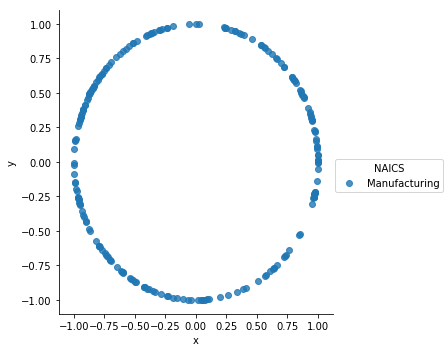

In [243]:
sns.lmplot( x="x", y="y", data=visualize_firms_Manufacturing, hue="NAICS",fit_reg=False, legend=True)
plt.show()

# Cosine plot for Finance and Insurance industries

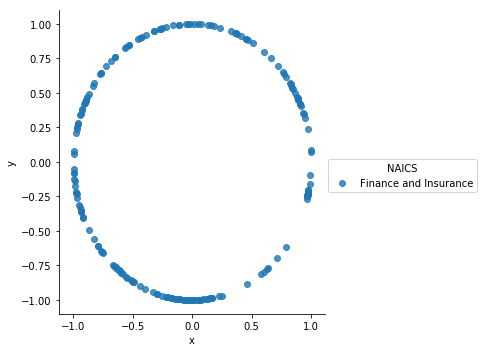

In [245]:
sns.lmplot( x="x", y="y", data=visualize_firms_FinanceAndInsurance, hue="NAICS",fit_reg=False, legend=True)
plt.show()

In [203]:
visualize_firms_cat6["State"]=firm_metadata["State"]

In [75]:
visualize_firms_cat7["State"]=firm_metadata["State"]

In [93]:
visualize_firms["State"]=firm_metadata["State"]

In [205]:
visualize_firms_cat6

,x,y,NAICS,State
0,-7.951281,-13.888682,Wholesale Trade,IL
1,3.731970,-15.826772,Manufacturing,SC
2,-9.134866,-16.867884,Real Estate and Rental and Leasing,GA
3,-6.277950,-14.336131,Manufacturing,IL
4,3.158447,-20.910286,Real Estate and Rental and Leasing,NJ
5,0.565869,-16.739170,Finance and Insurance,NY
6,0.778254,-15.902281,Administrative and Support and Waste Management,ID
7,-7.115036,-11.661075,Manufacturing,NY
8,-1.109219,-19.285398,Construction,AZ
9,-4.133062,9.644718,Construction,HI


# Visualize firm embedding for category 6 and category 7  cases based on their states

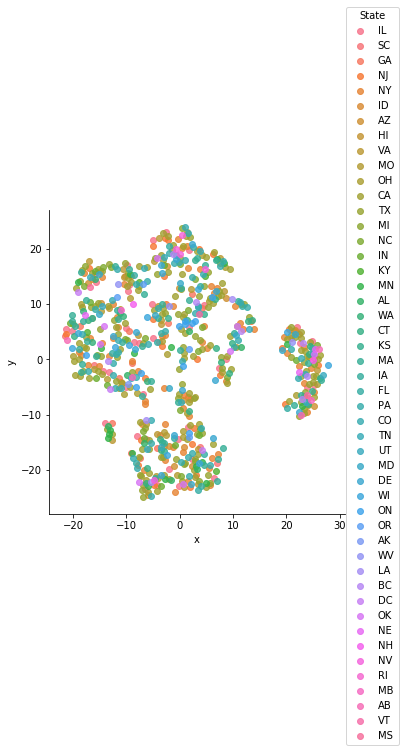

In [207]:
sns.lmplot( x="x", y="y", data=visualize_firms_cat6, hue="State",fit_reg=False, legend=True)
plt.show()

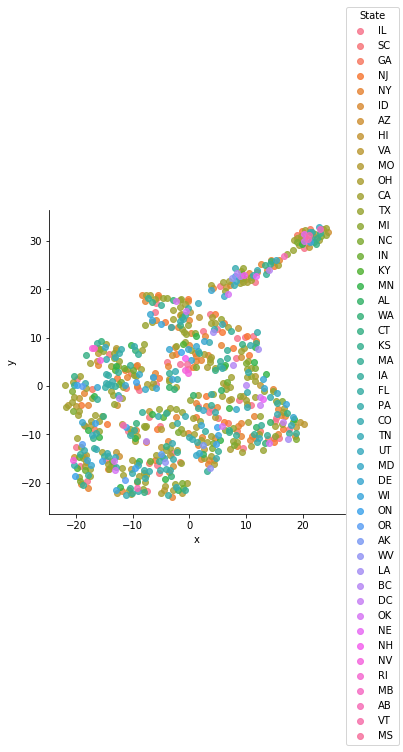

In [76]:
sns.lmplot( x="x", y="y", data=visualize_firms_cat7, hue="State",fit_reg=False, legend=True)
plt.show()

# Visualize firm embedding for both category cases combined 

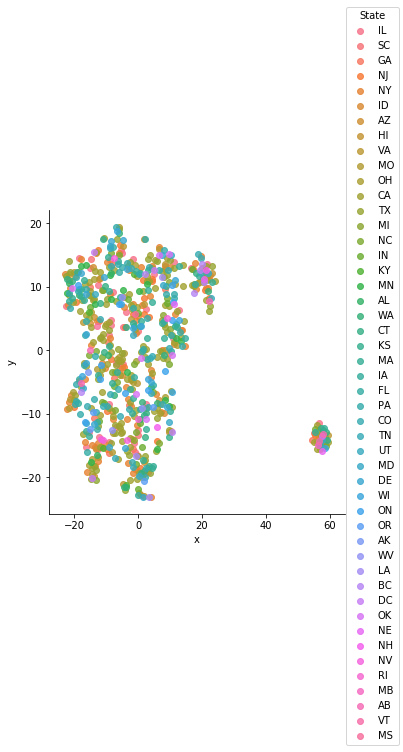

In [58]:
sns.lmplot( x="x", y="y", data=visualize_firms, hue="State",fit_reg=False, legend=True)
plt.show()

# Visualize embeddings against their rank in year 2013

In [109]:
visualize_firms["Rank"]=firm_metadata_rank["Rank"]

In [110]:
visualize_firms

,x,y,NAICS,State,CompanyName,City,Rank
0,-15.102431,12.906728,Wholesale Trade,IL,AAR CORP,Wood Dale,B
1,-14.614507,14.399132,Manufacturing and finance,SC,AVX CORP,Fountain Inn,B
2,-9.443826,1.303991,Real Estate and Rental and Leasing,GA,AARON'S INC,Atlanta,A-
3,-18.299786,-4.836130,Manufacturing and finance,IL,ABBOTT LABORATORIES,Abbott Park,B
4,20.813795,9.572906,Real Estate and Rental and Leasing,NJ,ALEXANDER'S INC,Paramus,B
5,-2.012612,-14.018727,Manufacturing and finance,NY,ALLEGHANY CORP,New York,B-
6,8.194173,-9.885369,Administrative and Support and Waste Management,ID,US ECOLOGY INC,Boise,B+
7,-14.288755,-14.847765,Manufacturing and finance,NY,ASTRONICS CORP,East Aurora,B
8,-13.657720,-19.730953,Construction,AZ,A V HOMES INC,Scottsdale,B-
9,1.875299,17.538265,Construction,HI,BARNWELL INDUSTRIES,Honolulu,C


In [113]:
visualize_firms['Rank']=visualize_firms['Rank'].fillna('Unknown')


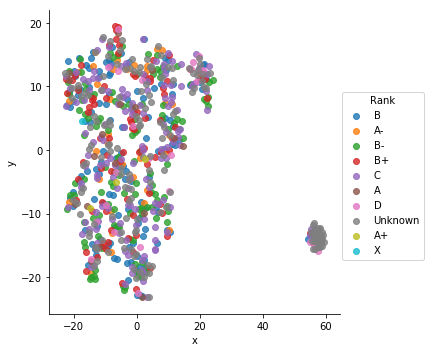

In [114]:
sns.lmplot( x="x", y="y", data=visualize_firms, hue="Rank",fit_reg=False, legend=True)
plt.show()

In [86]:
#df_plot = pd.DataFrame()
#df_plot['x-pca'] = pca_result_stockClass[:,0]
#df_plot['y-pca'] = pca_result_stockClass[:,1]
#df_plot['x-tsne'] = tsne_results_stock[:,0]
#df_plot['y-tsne'] = tsne_results_stock[:,1]

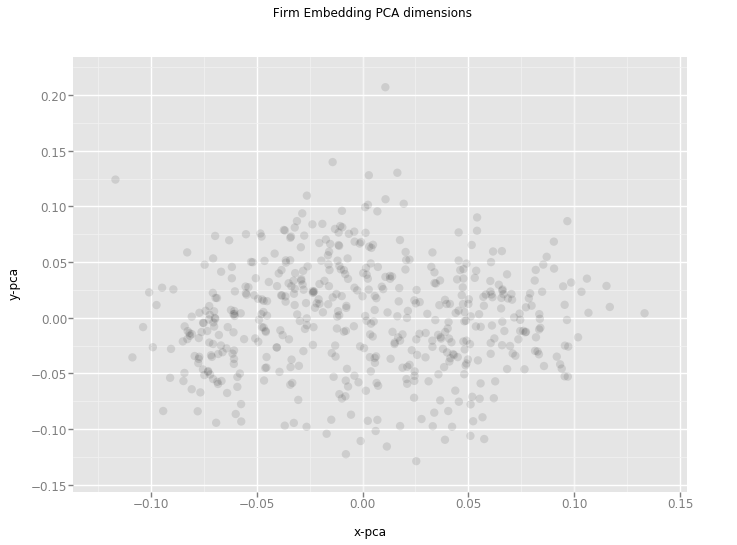

<ggplot: (-9223372036569089420)>

In [87]:
#stock class
#chart = ggplot( df_plot, aes(x='x-pca', y='y-pca') ) \
#        + geom_point(size=70,alpha=0.1) \
#        + ggtitle(" Firm Embedding PCA dimensions")
#chart

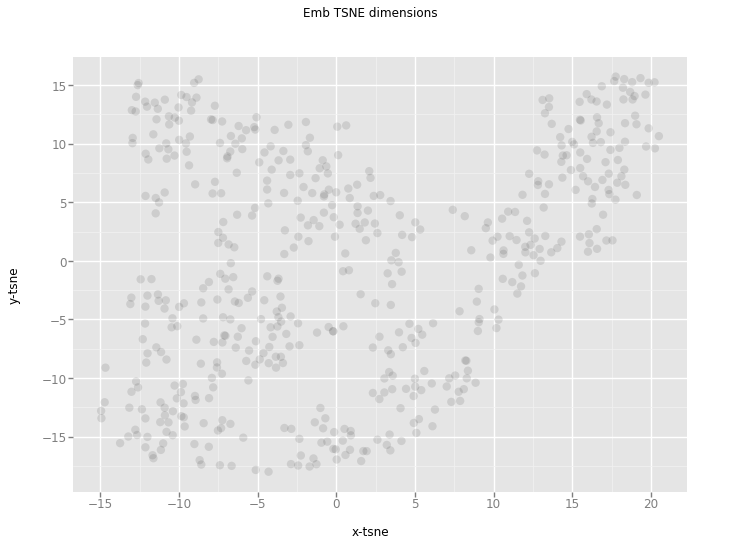

<ggplot: (285693125)>

In [88]:
#chart = ggplot( df_plot, aes(x='x-tsne', y='y-tsne') ) \
#        + geom_point(size=70,alpha=0.1) \
#        + ggtitle("Emb TSNE dimensions")
#chart

In [59]:
df_plot = pd.DataFrame()
df_plot['x-pca'] = pca_result[:,0]
df_plot['y-pca'] = pca_result[:,1]
df_plot['x-tsne'] = tsne_results[:,0]
df_plot['y-tsne'] = tsne_results[:,1]

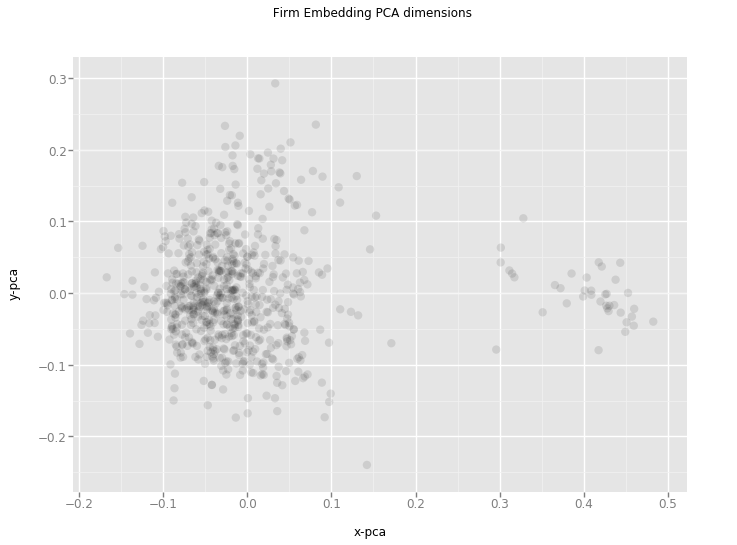

<ggplot: (-9223372036570060754)>

In [60]:
chart = ggplot( df_plot, aes(x='x-pca', y='y-pca') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle(" Firm Embedding PCA dimensions")
chart

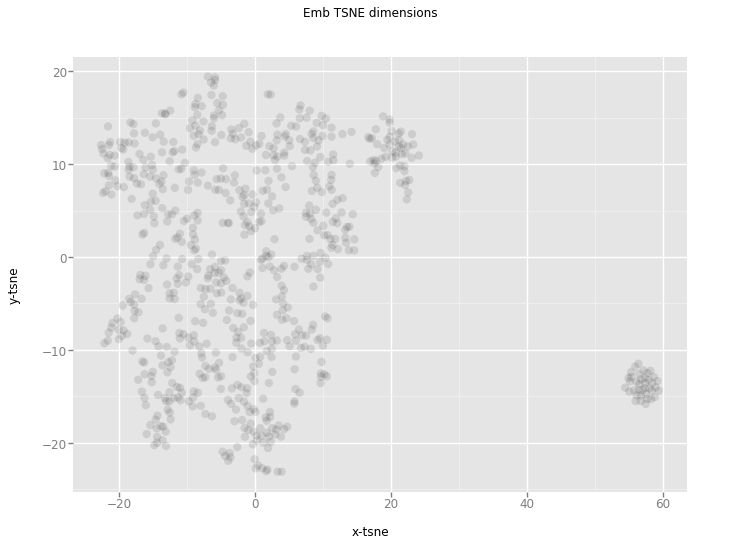

<ggplot: (-9223372036570032068)>

In [61]:
chart = ggplot( df_plot, aes(x='x-tsne', y='y-tsne') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("Emb TSNE dimensions")
chart

In [77]:
df_plot = pd.DataFrame()
df_plot['x-pca'] = pca_result_cat7[:,0]
df_plot['y-pca'] = pca_result_cat7[:,1]
df_plot['x-tsne'] = tsne_results_cat7[:,0]
df_plot['y-tsne'] = tsne_results_cat7[:,1]

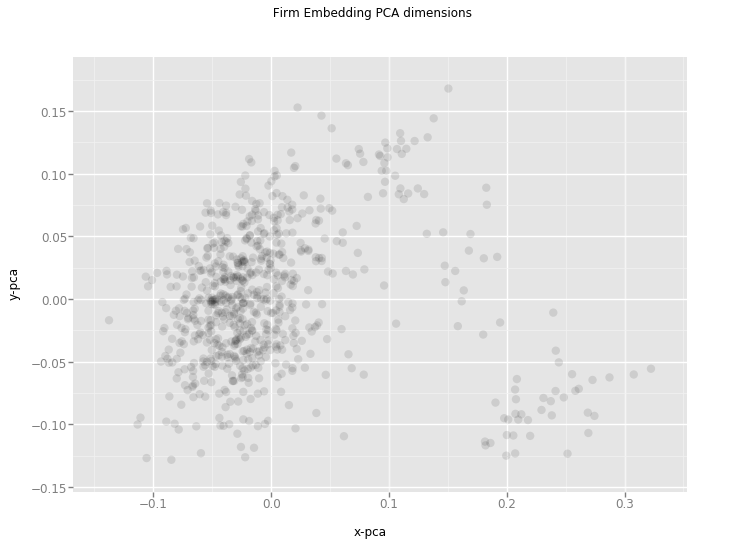

<ggplot: (284699989)>

In [78]:
chart = ggplot( df_plot, aes(x='x-pca', y='y-pca') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle(" Firm Embedding PCA dimensions")
chart

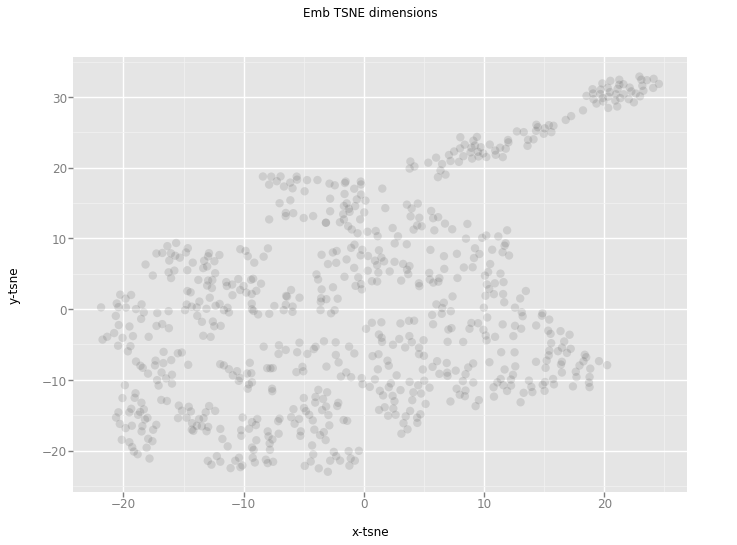

<ggplot: (284700108)>

In [79]:
chart = ggplot( df_plot, aes(x='x-tsne', y='y-tsne') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("Emb TSNE dimensions")
chart

In [80]:
tsne_results

array([[-15.102431 ,  12.906728 ],
       [-14.614507 ,  14.399132 ],
       [ -9.443826 ,   1.3039913],
       ...,
       [  8.579287 ,  13.54786  ],
       [-17.32282  ,   4.4969416],
       [  2.925272 ,  10.463079 ]], dtype=float32)

In [81]:
type(tsne_results)

numpy.ndarray

In [94]:
visualize_firms

,x,y,NAICS,State
0,-15.102431,12.906728,Wholesale Trade,IL
1,-14.614507,14.399132,Manufacturing,SC
2,-9.443826,1.303991,Real Estate and Rental and Leasing,GA
3,-18.299786,-4.836130,Manufacturing,IL
4,20.813795,9.572906,Real Estate and Rental and Leasing,NJ
5,-2.012612,-14.018727,Finance and Insurance,NY
6,8.194173,-9.885369,Administrative and Support and Waste Management,ID
7,-14.288755,-14.847765,Manufacturing,NY
8,-13.657720,-19.730953,Construction,AZ
9,1.875299,17.538265,Construction,HI


In [95]:
visualize_firms['CompanyName'] = firm_metadata['CompanyName']

In [96]:
visualize_firms

,x,y,NAICS,State,CompanyName
0,-15.102431,12.906728,Wholesale Trade,IL,AAR CORP
1,-14.614507,14.399132,Manufacturing,SC,AVX CORP
2,-9.443826,1.303991,Real Estate and Rental and Leasing,GA,AARON'S INC
3,-18.299786,-4.836130,Manufacturing,IL,ABBOTT LABORATORIES
4,20.813795,9.572906,Real Estate and Rental and Leasing,NJ,ALEXANDER'S INC
5,-2.012612,-14.018727,Finance and Insurance,NY,ALLEGHANY CORP
6,8.194173,-9.885369,Administrative and Support and Waste Management,ID,US ECOLOGY INC
7,-14.288755,-14.847765,Manufacturing,NY,ASTRONICS CORP
8,-13.657720,-19.730953,Construction,AZ,A V HOMES INC
9,1.875299,17.538265,Construction,HI,BARNWELL INDUSTRIES


In [97]:
visualize_firms['City'] = firm_metadata['City']

In [98]:
visualize_firms

,x,y,NAICS,State,CompanyName,City
0,-15.102431,12.906728,Wholesale Trade,IL,AAR CORP,Wood Dale
1,-14.614507,14.399132,Manufacturing,SC,AVX CORP,Fountain Inn
2,-9.443826,1.303991,Real Estate and Rental and Leasing,GA,AARON'S INC,Atlanta
3,-18.299786,-4.836130,Manufacturing,IL,ABBOTT LABORATORIES,Abbott Park
4,20.813795,9.572906,Real Estate and Rental and Leasing,NJ,ALEXANDER'S INC,Paramus
5,-2.012612,-14.018727,Finance and Insurance,NY,ALLEGHANY CORP,New York
6,8.194173,-9.885369,Administrative and Support and Waste Management,ID,US ECOLOGY INC,Boise
7,-14.288755,-14.847765,Manufacturing,NY,ASTRONICS CORP,East Aurora
8,-13.657720,-19.730953,Construction,AZ,A V HOMES INC,Scottsdale
9,1.875299,17.538265,Construction,HI,BARNWELL INDUSTRIES,Honolulu


In [100]:
visualize_firms.loc[visualize_firms['x'] > 30]

,x,y,NAICS,State,CompanyName,City
65,56.791168,-14.901423,Manufacturing,CO,MOLYCORP INC,Greenwood Village
210,55.354706,-12.403040,Manufacturing,NC,TENAX THERAPEUTICS INC,Morrisville
232,56.847130,-13.166709,"Agriculture, Forestry, Fishing and Hunting",CA,LIMONEIRA CO,Santa Paula
236,55.197147,-13.393043,Manufacturing,NJ,DERMA SCIENCES INC,Princeton
325,57.423195,-14.115429,Information,UT,PARK CITY GROUP INC,Salt Lake City
373,54.492565,-14.063483,Finance and Insurance,GA,CHARTER FINANCIAL CORP/MD,West Point
375,54.992031,-13.033429,Real Estate and Rental and Leasing,GA,PIEDMONT OFFICE REALTY TRUST,Johns Creek
437,55.101425,-14.492398,Manufacturing,CA,ECOTALITY INC,San Francisco
473,58.226990,-12.251955,Finance and Insurance,MA,LPL FINANCIAL HOLDINGS INC,Boston
475,56.184814,-14.898335,Manufacturing,MB,IMRIS INC,Winnipeg


In [102]:
visualize_testing = visualize_firms

In [103]:
visualize_testing

,x,y,NAICS,State,CompanyName,City
0,-15.102431,12.906728,Wholesale Trade,IL,AAR CORP,Wood Dale
1,-14.614507,14.399132,Manufacturing,SC,AVX CORP,Fountain Inn
2,-9.443826,1.303991,Real Estate and Rental and Leasing,GA,AARON'S INC,Atlanta
3,-18.299786,-4.836130,Manufacturing,IL,ABBOTT LABORATORIES,Abbott Park
4,20.813795,9.572906,Real Estate and Rental and Leasing,NJ,ALEXANDER'S INC,Paramus
5,-2.012612,-14.018727,Finance and Insurance,NY,ALLEGHANY CORP,New York
6,8.194173,-9.885369,Administrative and Support and Waste Management,ID,US ECOLOGY INC,Boise
7,-14.288755,-14.847765,Manufacturing,NY,ASTRONICS CORP,East Aurora
8,-13.657720,-19.730953,Construction,AZ,A V HOMES INC,Scottsdale
9,1.875299,17.538265,Construction,HI,BARNWELL INDUSTRIES,Honolulu


In [104]:
visualize_testing.loc[visualize_testing.NAICS == 'Manufacturing', 'NAICS'] = "Manufacturing and finance"
visualize_testing.loc[visualize_testing.NAICS == 'Finance and Insurance', 'NAICS'] = "Manufacturing and finance"

In [105]:
visualize_testing

,x,y,NAICS,State,CompanyName,City
0,-15.102431,12.906728,Wholesale Trade,IL,AAR CORP,Wood Dale
1,-14.614507,14.399132,Manufacturing and finance,SC,AVX CORP,Fountain Inn
2,-9.443826,1.303991,Real Estate and Rental and Leasing,GA,AARON'S INC,Atlanta
3,-18.299786,-4.836130,Manufacturing and finance,IL,ABBOTT LABORATORIES,Abbott Park
4,20.813795,9.572906,Real Estate and Rental and Leasing,NJ,ALEXANDER'S INC,Paramus
5,-2.012612,-14.018727,Manufacturing and finance,NY,ALLEGHANY CORP,New York
6,8.194173,-9.885369,Administrative and Support and Waste Management,ID,US ECOLOGY INC,Boise
7,-14.288755,-14.847765,Manufacturing and finance,NY,ASTRONICS CORP,East Aurora
8,-13.657720,-19.730953,Construction,AZ,A V HOMES INC,Scottsdale
9,1.875299,17.538265,Construction,HI,BARNWELL INDUSTRIES,Honolulu


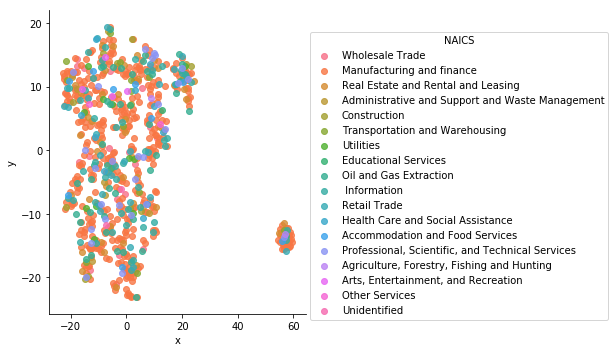

In [106]:
sns.lmplot( x="x", y="y", data=visualize_testing, hue="NAICS",fit_reg=False, legend=True)
plt.show()